In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Loading the graph

In [37]:
def load_soln(path): # iterate each line as an edge
    parseNode = lambda x: tuple(sorted([int(y) for y in x.split(' ')]))
    graph = nx.read_edgelist(path, create_using=nx.DiGraph(), nodetype=parseNode, delimiter=' -> ')

    print(list(graph.edges())[:500])
    print(f"There are {len(graph.nodes())} nodes and {len(graph.edges())} edges")
    
    return graph

## Visualize the data
with a custom layout

In [38]:
def large_layout(graph):
    by_height = dict()
    
    for node in graph.nodes():
        height = -len(node)
        by_height[height] = by_height.get(height, []) + [node]
    
    layout = dict()
    
    for height in by_height:
        nodes = by_height[height]
        
        for i in range(len(nodes)):
            x = sum(nodes[i]) / len(nodes[i])
            layout[nodes[i]] = (x, height)
    
    return layout


def pretty_layout(graph):
    layout = nx.circular_layout(graph)
    layout = {node: (x, -len(node)) for node, (x, y) in layout.items()}
    return layout


def draw(graph):
    node_count = len(graph.nodes())
    sub = graph.subgraph(list(graph.nodes())[:node_count])

    # colored according out degree
    node_color = [sub.out_degree(node) for node in sub.nodes()]
    # edges colored according to source node
    edge_color = [sub.out_degree(edge[0]) for edge in sub.edges()]
    color_map = plt.get_cmap('cool')

    if node_count > 20:
        node_count = math.sqrt(node_count)
        nx.draw(sub, 
                large_layout(sub), 
                edge_cmap=color_map,
                edge_color=edge_color, 
                node_color=(0,0,0),
                edge_vmin=0,
                node_size=90/node_count,
                arrowsize=90/node_count,
                width=21/node_count)
    else:
        nx.draw(sub,
                large_layout(sub), 
                # nx.spring_layout(sub, k=0.5, iterations=20),
                cmap=color_map,
                edge_cmap=color_map,
                node_color=node_color,
                edge_color=edge_color,
                edge_vmin=0,
                with_labels=True,
                node_size=500,
                arrowsize=15,
                width=2,
                font_size=7)

    plt.show()

[((1, 2, 3, 4, 5), (1, 2, 3, 4, 5, 193, 248, 424, 438, 457, 541, 596, 640)), ((1, 2, 3, 5), (1, 2, 3, 4, 5)), ((1, 2, 3, 5), (1, 2, 3, 5, 11)), ((1, 2, 3, 5), (1, 2, 3, 5, 17)), ((1, 2, 3, 5), (1, 2, 3, 5, 19)), ((1, 2, 3, 5), (1, 2, 3, 5, 29)), ((1, 2, 3, 5), (1, 2, 3, 5, 33)), ((1, 2, 3, 5), (1, 2, 3, 5, 83)), ((1, 2, 3, 5), (1, 2, 3, 5, 193)), ((1, 2, 3, 5), (1, 2, 3, 5, 196)), ((1, 2, 3, 5), (1, 2, 3, 5, 452)), ((1, 2, 3, 5), (1, 2, 3, 5, 385)), ((1, 2, 3, 5), (1, 2, 3, 5, 248)), ((1, 2, 3, 5), (1, 2, 3, 5, 206)), ((1, 2, 3, 5), (1, 2, 3, 5, 563)), ((1, 2, 3, 5), (1, 2, 3, 5, 194)), ((1, 2, 3, 5), (1, 2, 3, 5, 100)), ((1, 2, 3, 5), (1, 2, 3, 5, 620)), ((1, 2, 3, 5), (1, 2, 3, 5, 405)), ((1, 2, 3, 5), (1, 2, 3, 5, 302)), ((1, 2, 3, 5), (1, 2, 3, 5, 96)), ((1, 2, 3, 5), (1, 2, 3, 5, 440)), ((1, 2, 3, 5), (1, 2, 3, 5, 171)), ((1, 2, 3, 5), (1, 2, 3, 5, 150)), ((1, 2, 3, 5), (1, 2, 3, 5, 116)), ((1, 2, 3, 5), (1, 2, 3, 5, 327)), ((1, 2, 3, 5), (1, 2, 3, 5, 468)), ((1, 2, 3, 5), (1, 2, 

/Users/simon/Code/work/SubsetLatticeBuilder/pythonAnalysis/venv/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


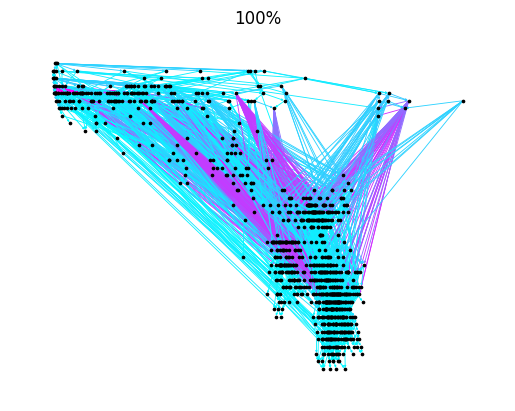

[((1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685), (1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 265, 295, 310, 327, 329, 353, 422, 468, 496, 519, 563, 570, 673, 679, 680, 681, 682, 685)), ((1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685), (1, 2, 3, 5, 11, 13, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685, 706)), ((1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685), (1, 2, 3, 5, 11, 42, 68, 94, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685)), ((1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685), (1, 2, 3, 5, 11, 42, 68, 103, 149, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 49

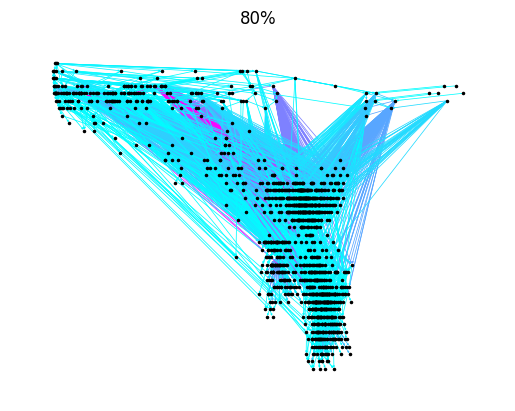

[((1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 346, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685), (1, 2, 3, 5, 11, 42, 52, 68, 103, 228, 238, 264, 295, 310, 327, 329, 346, 353, 379, 422, 468, 496, 563, 570, 587, 673, 679, 680, 681, 682, 685)), ((1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 346, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685), (1, 2, 3, 5, 11, 42, 68, 103, 176, 228, 238, 264, 265, 295, 310, 327, 329, 346, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685)), ((1, 2, 3, 5, 11, 42, 52, 68, 103, 228, 238, 264, 295, 310, 327, 329, 346, 353, 379, 422, 468, 496, 563, 570, 587, 673, 679, 680, 681, 682, 685), (1, 2, 3, 5, 11, 42, 52, 58, 68, 103, 228, 238, 264, 295, 310, 327, 329, 346, 353, 379, 422, 468, 496, 563, 570, 587, 673, 679, 680, 681, 682, 685)), ((1, 2, 3, 144, 171, 212, 261, 293, 348, 378, 426, 477, 529, 610, 638, 652, 662, 670, 691, 717, 736), (1, 2, 3, 5, 144, 153, 170, 171, 189, 204, 212, 2

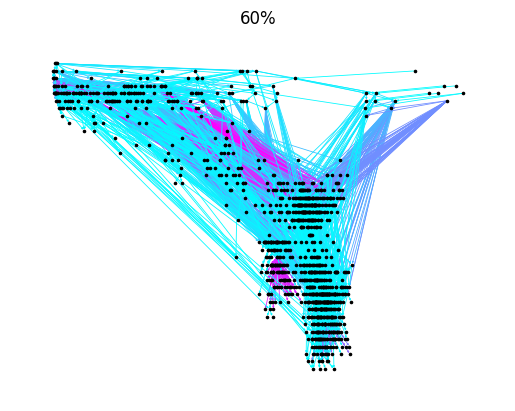

[((5, 68, 228, 327, 496, 563, 570), (1, 2, 3, 5, 11, 42, 68, 103, 228, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682)), ((5, 68, 228, 327, 496, 563, 570), (1, 2, 3, 5, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682, 685)), ((5, 68, 228, 327, 496, 563, 570), (1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682)), ((5, 68, 228, 327, 496, 563, 570), (1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681)), ((5, 68, 228, 327, 496, 563, 570), (1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 496, 563, 570, 673, 679, 680, 681, 682, 685)), ((5, 68, 228, 327, 496, 563, 570), (2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682)), ((5, 68, 228, 327, 496, 563, 570), (1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295,

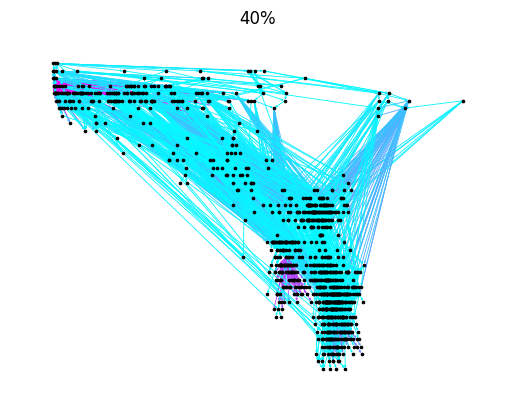

[((1, 2, 3, 5, 55, 144, 153, 170, 171, 204, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 53, 55, 144, 153, 170, 171, 204, 212, 246, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 555, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 692, 717, 736)), ((1, 2, 3, 5, 55, 144, 153, 170, 171, 204, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 55, 116, 144, 153, 170, 171, 189, 204, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 669, 670, 674, 691, 717, 736)), ((1, 2, 3, 5, 55, 144, 153, 170, 171, 204, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 55, 144, 153, 170, 171, 189, 204, 212, 230, 261, 293, 348, 378, 420, 426, 439, 448

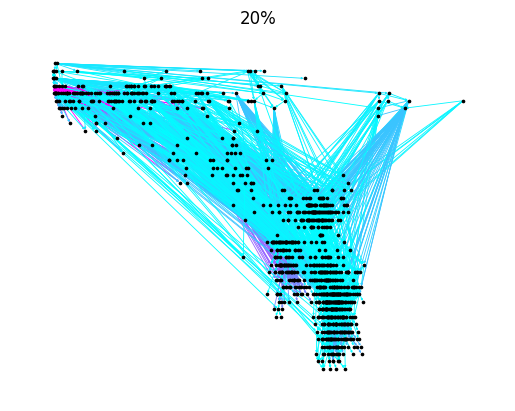

[((1, 2, 3, 5, 55, 144, 153, 170, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 55, 144, 153, 170, 171, 196, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 548, 553, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736)), ((1, 2, 3, 5, 55, 144, 153, 170, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 55, 144, 153, 170, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 719, 723, 736)), ((1, 2, 3, 5, 55, 144, 153, 170, 171, 212, 261, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 638, 639, 652, 658, 662, 670, 674, 691, 717, 736), (1, 2, 3, 5, 55, 144, 153, 170, 171, 204, 212, 261, 272, 293, 348, 378, 420, 426, 439, 448, 477, 484, 529, 538, 558, 610, 628, 63

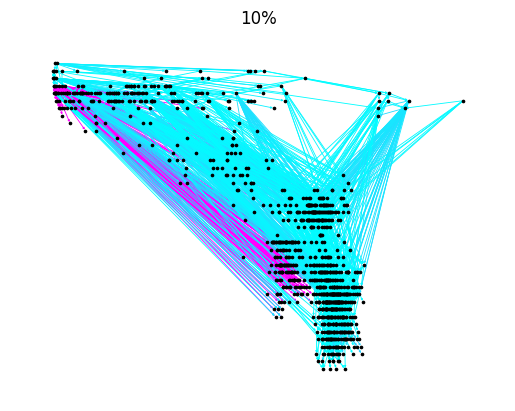

[((1, 2, 3, 5), (1, 2, 3, 5, 96, 239, 242, 282, 317, 321, 403, 452, 554, 631)), ((1, 2, 3, 5), (1, 2, 3, 5, 11, 83, 240, 563)), ((1, 2, 3, 5), (1, 2, 3, 5, 11, 42, 59, 68, 69, 103, 182, 228, 238, 264, 295, 310, 327, 329, 353, 415, 416, 422, 468, 496, 536, 563, 570, 673, 679, 680, 681, 682, 685)), ((1, 2, 3, 5), (1, 2, 3, 5, 11, 42, 68, 103, 228, 264, 295, 310, 327, 329, 353, 422, 468, 496, 563, 570, 673, 679, 680, 681, 682)), ((1, 2, 3, 5), (1, 2, 3, 5, 7, 16, 17, 27, 50, 193, 334, 495, 532, 608, 627)), ((1, 2, 3, 5), (1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 265, 295, 310, 327, 329, 353, 422, 468, 563, 570, 673, 679, 680, 681, 682)), ((1, 2, 3, 5), (1, 2, 3, 5, 40, 135, 179, 276, 303, 323, 336, 337, 363, 442, 466, 468, 473, 478, 486, 539, 556, 568, 569, 570, 584, 647, 694, 720, 721, 722)), ((1, 2, 3, 5), (1, 2, 3, 5, 620)), ((1, 2, 3, 5), (1, 2, 3, 5, 11, 42, 68, 103, 228, 238, 264, 295, 310, 327, 329, 353, 422, 468, 496, 536, 563, 570, 617, 673, 679, 680, 681, 682, 685)), ((1, 2, 

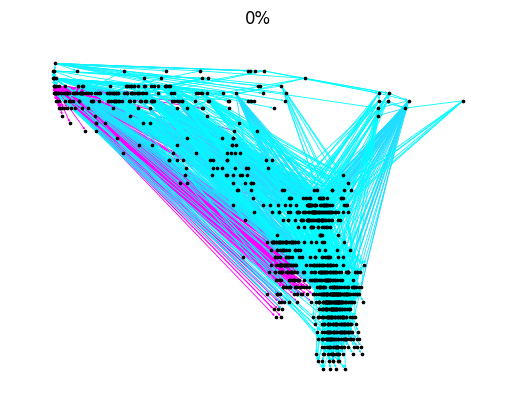

In [39]:
id = 1109

graph = load_soln(f"../data/soln/{id}.txt")
plt.title(f'100%')
draw(graph)

s = [80, 60, 40, 20, 10, 0]
counts = []

counts.append((100, len(graph.nodes()), len(graph.edges())))
for s in s:
    graph = load_soln(f"../data/tmp/{id}_s{s}.soln")
    counts.append((s, len(graph.nodes()), len(graph.edges())))
    plt.title(f'{s}%')
    draw(graph)

[(100, 1109, 3131), (80, 1475, 5175), (60, 1282, 3728), (40, 1157, 2965), (20, 1154, 2976), (10, 1154, 2442), (0, 1150, 2436)]


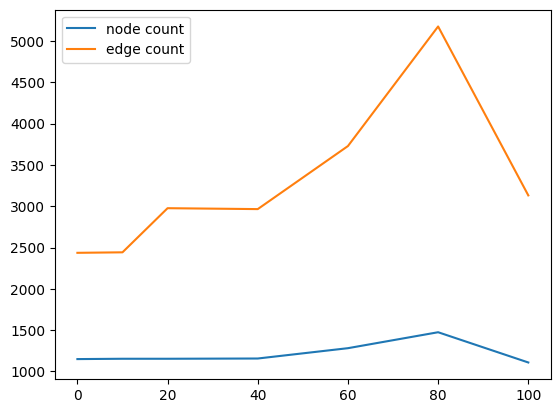

In [40]:
# two plots of node count and edge count over s
print(counts)
plt.plot([x[0] for x in counts], [x[1] for x in counts], label='node count')
plt.plot([x[0] for x in counts], [x[2] for x in counts], label='edge count')
plt.legend()
plt.show()